In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#scikit-learn
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report

import shap

In [2]:
data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_v2.csv"
df = pd.read_csv(data_brut)

data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_v1.csv"
df1 = pd.read_csv(data_brut)

In [3]:
# Définie les options d'affichage pour les lignes et colonnes
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',80)

In [4]:
df = df.drop(columns=["Unnamed: 0","Latitude","Longitude"])

In [5]:
df.isna().mean().sort_values(ascending=False).head(5)

Prop.Electricity                                        0.001313
Prop.NaturalGas                                         0.001313
index                                                   0.000000
Personal Services (Health/Beauty, Dry Cleaning, etc)    0.000000
Residence Hall/Dormitory                                0.000000
dtype: float64

In [6]:
df = df.dropna()

In [7]:
print("Pourcentage de valeurs nulles: {}%".format(df.isna().mean().sum()))

Pourcentage de valeurs nulles: 0.0%


In [8]:
df.select_dtypes(include="object").columns

Index([], dtype='object')

In [9]:
df.select_dtypes(include=["int","float"]).columns

Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'SiteEnergyUseWN(kBtu)', 'Prop.Electricity',
       'Prop.NaturalGas', 'Adult Education', 'Automobile Dealership',
       'Bank Branch', 'College/University', 'Convention Center', 'Courthouse',
       'Data Center', 'Distribution Center', 'Financial Office',
       'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Service',
       'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
       'Laboratory', 'Library', 'Lifestyle Center',
       'Manufacturing/Industrial Plant', 'Medical Office', 'Movie Theater',
       'Multifamily Housing', 'Museum', 'Non-Refrigerated Warehouse', 'Office',
       'Other', 'Other - Education', 'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services', 'Other - Utility',
       'Other/Specialty Hospit

In [10]:
X = df.drop(columns="SiteEnergyUseWN(kBtu)")
y = df["SiteEnergyUseWN(kBtu)"]

In [11]:
categorical_cols = ["CouncilDistrictCode"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, X.columns),
    ('cat', categorical_transformer, categorical_cols)
    ])

# KNeighborsRegressor()

In [13]:
tt = TransformedTargetRegressor(regressor=KNeighborsRegressor(),func=np.log1p, inverse_func=np.expm1)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'model__regressor__n_neighbors': list(range(1, 30)),
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


0.49346863965837784
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Convenience Store without Gas Station', 'Enclosed Mall', 'Food Sales',
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                        

In [14]:
result = pd.DataFrame(grid_search.cv_results_)

In [15]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010949,0.001492,0.036820,0.032466,1,{'model__regressor__n_neighbors': 1},0.715383,0.361380,0.403643,0.493469,0.157863,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.010499,0.001719,0.013686,0.000684,2,{'model__regressor__n_neighbors': 2},0.494476,0.481506,0.407945,0.461309,0.038104,2,0.736677,0.832398,0.855263,0.808113,0.051368
2,0.014091,0.004382,0.012466,0.000219,3,{'model__regressor__n_neighbors': 3},0.416467,0.493359,0.247446,0.385757,0.102715,3,0.563796,0.701841,0.793226,0.686288,0.094308
3,0.008087,0.001435,0.015776,0.005245,4,{'model__regressor__n_neighbors': 4},0.263822,0.459003,0.213420,0.312082,0.105907,4,0.435784,0.610377,0.560527,0.535563,0.073431
4,0.004888,0.003534,0.011091,0.007946,5,{'model__regressor__n_neighbors': 5},0.204541,0.424477,0.162115,0.263711,0.114991,5,0.346502,0.526719,0.406397,0.426539,0.074939
5,0.010125,0.002789,0.006545,0.004692,6,{'model__regressor__n_neighbors': 6},0.178581,0.408353,0.146216,0.244383,0.116694,6,0.292604,0.365431,0.344516,0.334183,0.030616
6,0.011974,0.004291,0.010002,0.000666,7,{'model__regressor__n_neighbors': 7},0.158844,0.374747,0.134450,0.222680,0.107988,7,0.268710,0.255755,0.301118,0.275195,0.019078
7,0.007877,0.000795,0.009149,0.000681,8,{'model__regressor__n_neighbors': 8},0.166154,0.343487,0.126314,0.211985,0.094398,8,0.246335,0.191322,0.246964,0.228207,0.026083
8,0.008162,0.001323,0.009482,0.000966,9,{'model__regressor__n_neighbors': 9},0.132926,0.327571,0.096916,0.185805,0.101316,9,0.220879,0.161142,0.216321,0.199447,0.027150
9,0.006063,0.001482,0.010634,0.000110,10,{'model__regressor__n_neighbors': 10},0.117352,0.309999,0.094910,0.174087,0.096540,10,0.195820,0.137745,0.189113,0.174226,0.025941


In [16]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_kkn_result.csv", sep=";")

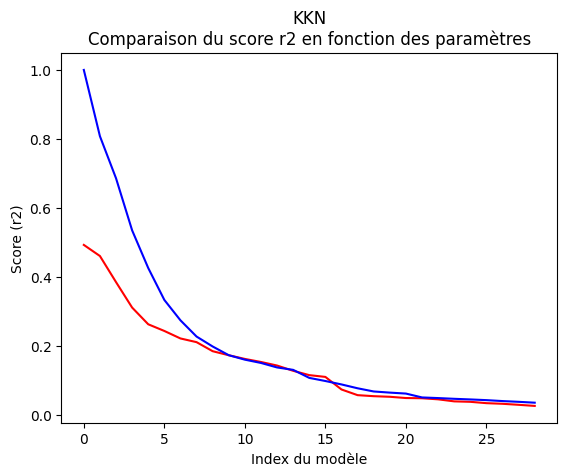

In [17]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("KKN\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_kkn_score.png", dpi=300)

# RandomForestRegressor

In [18]:
tt = TransformedTargetRegressor(regressor=RandomForestRegressor(),func=np.log1p, inverse_func=np.expm1)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

param_grid = {
    'model__regressor__n_estimators': [200],          # Number of trees in the forest
    'model__regressor__max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    #'model__regressor__min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    #'model__regressor__min_samples_leaf': [1, 2, 4],         # Bootstrap Aggregating (Bagging)
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.2233950172330665
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Convenience Store without Gas Station', 'Enclosed Mall', 'Food Sales',
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot

In [19]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__max_depth,param_model__regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.037179,0.075482,0.034249,0.005014,None,200,"{'model__regressor__max_depth': None, 'model__...",0.153574,0.317166,0.199445,0.223395,0.068900,1,0.660671,0.673033,0.687122,0.673609,0.010806
1,1.815978,0.111106,0.031033,0.002851,10,200,"{'model__regressor__max_depth': 10, 'model__re...",0.142683,0.292770,0.147041,0.194165,0.069747,4,0.620814,0.659689,0.644464,0.641656,0.015994
2,2.563210,0.241335,0.035800,0.006552,20,200,"{'model__regressor__max_depth': 20, 'model__re...",0.154341,0.304312,0.178891,0.212514,0.065680,2,0.631514,0.640091,0.699365,0.656990,0.030168
3,2.150394,0.165687,0.024691,0.002440,30,200,"{'model__regressor__max_depth': 30, 'model__re...",0.150982,0.315436,0.154128,0.206848,0.076794,3,0.617364,0.670734,0.645906,0.644668,0.021806


In [20]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_RandomForest_result.csv", sep=";")

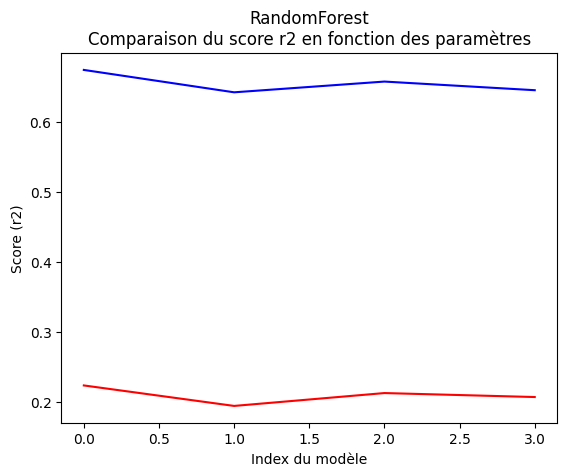

In [21]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("RandomForest\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_RandomForest_score.png", dpi=300)

# GradientBoostingRegressor()

In [22]:
tt = TransformedTargetRegressor(regressor=GradientBoostingRegressor(),func=np.log1p, inverse_func=np.expm1)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

param_grid = {
    'model__regressor__n_estimators': [10, 100, 200],          # Number of trees in the forest
    'model__regressor__min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    'model__regressor__min_samples_leaf': [1, 2, 4],
    #'model__learning_rate': [0.1, 0.01, 0.001],       # Bootstrap Aggregating (Bagging)
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.44379837907937764
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE

In [23]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__min_samples_leaf,param_model__regressor__min_samples_split,param_model__regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.061168,0.005735,0.006669,0.000473,1,2,10,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.007028,0.079154,0.040586,0.042256,0.029469,22,0.067932,0.098906,0.072507,0.079781,0.013651
1,0.424248,0.004028,0.007000,0.000817,1,2,100,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.404368,0.450050,0.241555,0.365324,0.089483,4,0.649570,0.721387,0.776027,0.715661,0.051784
2,0.812825,0.014392,0.009090,0.000930,1,2,200,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.560411,0.498397,0.257576,0.438794,0.130618,2,0.845079,0.879036,0.894889,0.873001,0.020778
3,0.043090,0.007380,0.006266,0.008861,1,5,10,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.002377,0.089652,0.040586,0.044205,0.035722,19,0.067950,0.076235,0.072507,0.072230,0.003388
4,0.431027,0.008237,0.007333,0.000943,1,5,100,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.476409,0.301165,0.229664,0.335746,0.103659,6,0.589407,0.700723,0.756018,0.682050,0.069289
5,0.881223,0.046838,0.008050,0.000819,1,5,200,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.677864,-0.200803,0.265249,0.247437,0.358935,8,0.803526,0.861404,0.879742,0.848224,0.032481
6,0.049775,0.006878,0.002000,0.002828,1,10,10,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.002092,0.089652,0.040586,0.044110,0.035833,20,0.067792,0.076235,0.072507,0.072178,0.003455
7,0.464738,0.025104,0.012136,0.006735,1,10,100,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.499710,0.478356,0.225277,0.401114,0.124641,3,0.563464,0.688285,0.765426,0.672391,0.083213
8,0.856323,0.022207,0.012358,0.003257,1,10,200,"{'model__regressor__min_samples_leaf': 1, 'mod...",0.680808,0.477493,0.173094,0.443798,0.208638,1,0.798466,0.842058,0.868747,0.836424,0.028967
9,0.053360,0.002795,0.008473,0.001803,2,2,10,"{'model__regressor__min_samples_leaf': 2, 'mod...",-0.001279,0.099692,0.037998,0.045470,0.041559,17,0.066463,0.075151,0.069432,0.070348,0.003605


In [24]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_GradienBoosting_result.csv", sep=";")

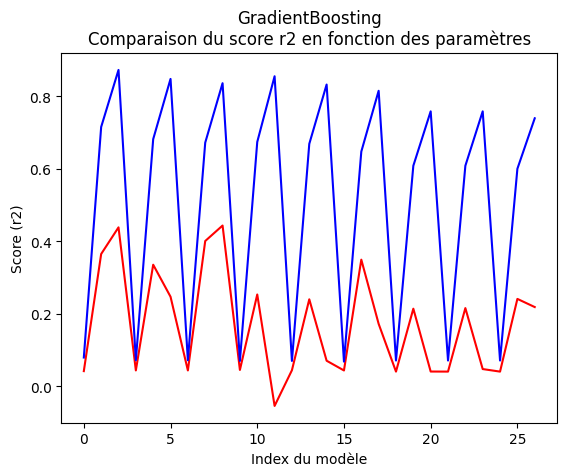

In [25]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("GradientBoosting\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_GradientBoosting_score.png", dpi=300)

# SVR

In [26]:
"""'model__regressor__C': [-1000, -100, -10, -1, -0.1, 0.1, 1, 10, 100, 1000],
    'model__regressor__gamma': [-0.0001, -0.001, -0.01, -0.1, 1, 0.1, 0.01, 0.001, 0.0001],"""

"'model__regressor__C': [-1000, -100, -10, -1, -0.1, 0.1, 1, 10, 100, 1000],\n    'model__regressor__gamma': [-0.0001, -0.001, -0.01, -0.1, 1, 0.1, 0.01, 0.001, 0.0001],"

In [27]:
tt = TransformedTargetRegressor(regressor=SVR(),func=np.log1p, inverse_func=np.expm1)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

param_grid = {
    #'model__regressor__C': [1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
    'model__regressor__C': range(1,100),
    } 

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 99 candidates, totalling 297 fits
0.27411371056507206
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Convenience Store without Gas Station', 'Enclosed Mall', 'Food Sales',
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one

In [28]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.109062,0.023021,0.103097,0.021958,1,{'model__regressor__C': 1},0.156413,0.433401,0.148257,0.246024,0.132537,17,0.408569,0.396495,0.386616,0.397227,0.008977
1,0.107901,0.019775,0.075724,0.000413,2,{'model__regressor__C': 2},0.162192,0.476682,0.172779,0.270551,0.145821,3,0.644789,0.744177,0.697901,0.695622,0.040607
2,0.111085,0.020125,0.095864,0.002388,3,{'model__regressor__C': 3},0.160495,0.482915,0.178932,0.274114,0.147836,1,0.895604,0.947095,0.926322,0.923007,0.021151
3,0.104603,0.010374,0.089093,0.001047,4,{'model__regressor__C': 4},0.153459,0.480789,0.182104,0.272117,0.148016,2,0.954705,0.963010,0.947827,0.955181,0.006208
4,0.186388,0.006713,0.087591,0.014265,5,{'model__regressor__C': 5},0.147569,0.468688,0.184975,0.267077,0.143376,4,0.958640,0.964264,0.950650,0.957851,0.005586
5,0.114990,0.020173,0.086168,0.006883,6,{'model__regressor__C': 6},0.142957,0.461171,0.185895,0.263341,0.140981,5,0.960762,0.965211,0.953470,0.959814,0.004840
6,0.108368,0.009685,0.078586,0.004501,7,{'model__regressor__C': 7},0.138021,0.464473,0.184511,0.262335,0.144188,6,0.961785,0.965935,0.955638,0.961119,0.004230
7,0.143358,0.017027,0.089983,0.020113,8,{'model__regressor__C': 8},0.136849,0.466161,0.181882,0.261631,0.145789,7,0.963232,0.966692,0.957131,0.962352,0.003952
8,0.112634,0.000282,0.073573,0.001142,9,{'model__regressor__C': 9},0.135441,0.467928,0.177591,0.260320,0.147806,8,0.964470,0.967517,0.958180,0.963389,0.003888
9,0.126621,0.016912,0.078908,0.005220,10,{'model__regressor__C': 10},0.132525,0.468821,0.174678,0.258675,0.149589,9,0.965408,0.968194,0.959103,0.964235,0.003803


In [29]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_SVR_result.csv", sep=";")

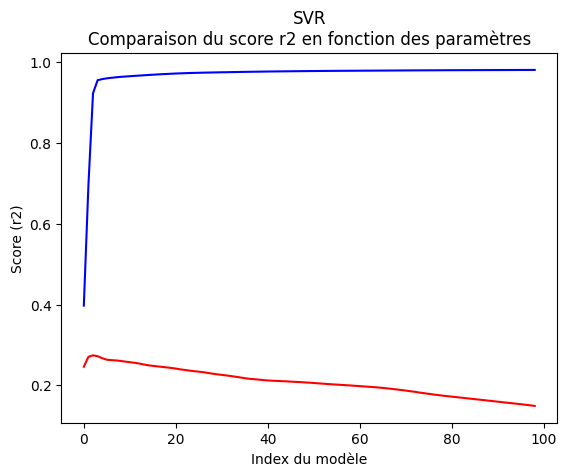

In [30]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("SVR\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_SVR_score.png", dpi=300)

# Ridge

In [31]:
tt = TransformedTargetRegressor(regressor=Ridge(),func=np.log1p, inverse_func=np.expm1)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

param_grid = {
    'model__regressor__alpha': [1e3, 1e4, 1e5, 1e6, 1e7, 1e8],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
-0.027345113052157588
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Convenience Store without Gas Station', 'Enclosed Mall', 'Food Sales',
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one

In [32]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.018973,0.001676,0.008485,0.001731,1000.0,{'model__regressor__alpha': 1000.0},0.556163,-1.831565e+06,0.589518,-610521.264107,863408.261936,6,0.305449,0.348665,0.400668,0.351594,0.038928
1,0.018118,0.000928,0.006484,0.001399,10000.0,{'model__regressor__alpha': 10000.0},-0.049237,-6.589431e-03,-0.026209,-0.027345,0.017429,1,-0.036301,-0.033897,-0.029784,-0.033327,0.002691
2,0.015555,0.000246,0.006197,0.001028,100000.0,{'model__regressor__alpha': 100000.0},-0.080693,-8.796596e-02,-0.056555,-0.075072,0.013425,2,-0.072470,-0.064841,-0.068202,-0.068504,0.003122
3,0.014945,0.000836,0.007890,0.002198,1000000.0,{'model__regressor__alpha': 1000000.0},-0.083461,-9.458136e-02,-0.059247,-0.079096,0.014752,3,-0.075860,-0.067692,-0.071747,-0.071766,0.003334
4,0.013652,0.005094,0.008827,0.002710,10000000.0,{'model__regressor__alpha': 10000000.0},-0.083734,-9.523104e-02,-0.059513,-0.079493,0.014887,4,-0.076196,-0.067975,-0.072098,-0.072090,0.003356
5,0.017775,0.001855,0.007843,0.000688,100000000.0,{'model__regressor__alpha': 100000000.0},-0.083761,-9.529589e-02,-0.059539,-0.079532,0.014901,5,-0.076230,-0.068003,-0.072133,-0.072122,0.003359


In [33]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Ridge_result.csv", sep=";")

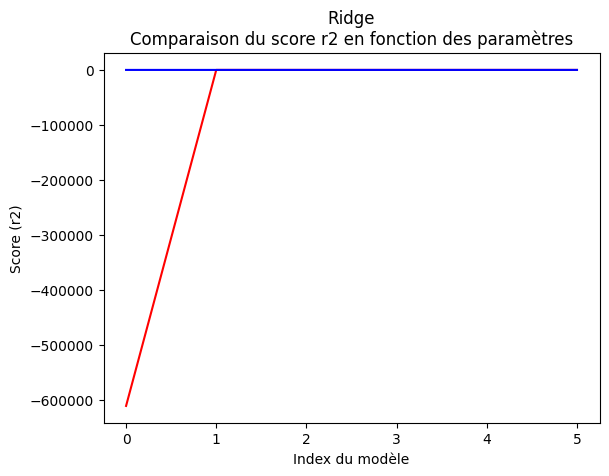

In [34]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("Ridge\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Ridge_score.png", dpi=300)

# Lasso

In [35]:
tt = TransformedTargetRegressor(regressor=Lasso(),func=np.log1p, inverse_func=np.exp)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

param_grid = {
    'model__regressor__alpha': [1e-4, 1e-1, 1, 1e1, 1e3, 1e4, 1e5, 1e6],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.11646806387856568
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Convenience Store without Gas Station', 'Enclosed Mall', 'Food Sales',
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('oneho

The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.


In [36]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.105895,0.006385,0.005805,2.990937e-03,0.0001,{'model__regressor__alpha': 0.0001},-3677.926973,-6.622671e+19,-2801.731319,-2.207557e+19,3.121957e+19,8,-5.646256,-7.897215,-2.661132,-5.401534,2.144615
1,0.044181,0.010684,0.009332,1.698677e-03,0.1,{'model__regressor__alpha': 0.1},0.315847,-1.341408e-01,0.167698,1.164681e-01,1.872444e-01,1,0.286193,0.371209,0.409236,0.355546,0.051439
2,0.018845,0.003141,0.008001,1.123916e-07,1,{'model__regressor__alpha': 1},-0.083764,-9.530303e-02,-0.059542,-7.953652e-02,1.490225e-02,2,-0.076233,-0.068006,-0.072137,-0.072125,0.003359
3,0.015396,0.002671,0.002595,3.670372e-03,10.0,{'model__regressor__alpha': 10.0},-0.083764,-9.530303e-02,-0.059542,-7.953652e-02,1.490225e-02,2,-0.076233,-0.068006,-0.072137,-0.072125,0.003359
4,0.023272,0.006505,0.006613,1.059003e-03,1000.0,{'model__regressor__alpha': 1000.0},-0.083764,-9.530303e-02,-0.059542,-7.953652e-02,1.490225e-02,2,-0.076233,-0.068006,-0.072137,-0.072125,0.003359
5,0.017378,0.000861,0.007671,1.251340e-03,10000.0,{'model__regressor__alpha': 10000.0},-0.083764,-9.530303e-02,-0.059542,-7.953652e-02,1.490225e-02,2,-0.076233,-0.068006,-0.072137,-0.072125,0.003359
6,0.016451,0.000702,0.007437,1.841165e-05,100000.0,{'model__regressor__alpha': 100000.0},-0.083764,-9.530303e-02,-0.059542,-7.953652e-02,1.490225e-02,2,-0.076233,-0.068006,-0.072137,-0.072125,0.003359
7,0.013215,0.001485,0.003381,2.901149e-03,1000000.0,{'model__regressor__alpha': 1000000.0},-0.083764,-9.530303e-02,-0.059542,-7.953652e-02,1.490225e-02,2,-0.076233,-0.068006,-0.072137,-0.072125,0.003359


In [37]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Lasso_result.csv", sep=";")

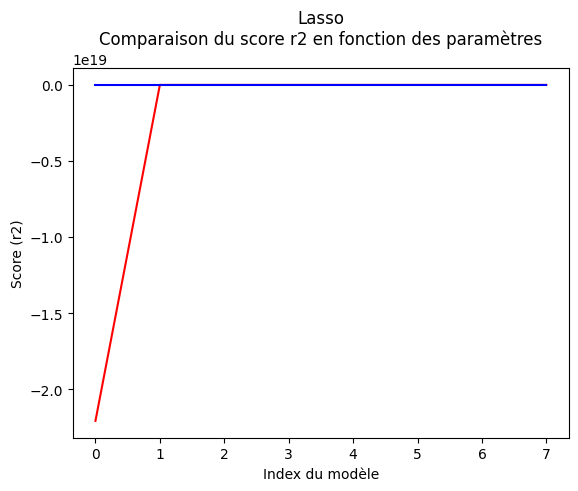

In [38]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("Lasso\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Lasso_score.png", dpi=300)

hyperopt, optuna -> 

Faire Grid search CV sur la pipeline (ajouter return_train_score = True)

In [39]:
df

,index,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),Prop.Electricity,Prop.NaturalGas,Adult Education,Automobile Dealership,Bank Branch,College/University,Convention Center,Courthouse,Data Center,Distribution Center,Financial Office,Fire Station,Fitness Center/Health Club/Gym,Food Service,Hospital (General Medical & Surgical),Hotel,K-12 School,Laboratory,Library,Lifestyle Center,Manufacturing/Industrial Plant,Medical Office,Movie Theater,Multifamily Housing,Museum,Non-Refrigerated Warehouse,Office,Other,Other - Education,Other - Entertainment/Public Assembly,Other - Lodging/Residential,Other - Mall,Other - Public Services,Other - Recreation,Other - Restaurant/Bar,Other - Services,Other - Utility,Other/Specialty Hospital,Parking,Performing Arts,"Personal Services (Health/Beauty, Dry Cleaning, etc)",Police Station,Pre-school/Daycare,Prison/Incarceration,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc)",Residence Hall/Dormitory,Residential Care Facility,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Social/Meeting Hall,Strip Mall,Supermarket/Grocery Store,Urgent Care/Clinic/Other Outpatient,Wholesale Club/Supercenter,Worship Facility,Bar/Nightclub,Convenience Store without Gas Station,Enclosed Mall,Food Sales,Swimming Pool,Vocational School,Fast Food Restaurant,Other - Technology/Science
0,0,7,1927,1,12,7456910,54.61,17.66,0,0,0,0,0,0,0,0,0,0,0,0,0,88434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,1996,1,11,8664479,38.66,61.34,0,0,0,0,0,0,0,0,0,0,0,0,0,83880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15064,0,0,0,0,0,0,0,0,0,4622,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,7,1969,1,41,73937112,68.23,2.06,0,0,0,0,0,0,0,0,0,0,0,0,0,756493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7,1926,1,10,6946800,40.75,26.66,0,0,0,0,0,0,0,0,0,0,0,0,0,61320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,7,1980,1,18,14656503,37.88,62.12,0,0,0,0,0,0,0,0,0,0,0,0,0,123445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,3371,2,1990,1,1,943003,61.70,38.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1519,3372,2,2004,1,1,1053705,41.73,58.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1520,3373,7,1974,1,1,6053764,31.08,68.92,0,0,0,0,0,0,0,0,0,0,5574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1521,3374,1,1989,1,1,782841,48.49,51.51,0,0,0,0,0,0,0,0,0,0,6501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6601,0,0,0,0,0,0,0,0,484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
df_final = pd.merge(df, df1[["Unnamed: 0","ENERGYSTARScore"]], left_on="index", right_on="Unnamed: 0", how="left")

In [41]:
df_final = df_final.drop(columns="Unnamed: 0")

In [42]:
df_final.isna().mean().sort_values(ascending=False).head(5)

ENERGYSTARScore                                    0.34714
Other - Mall                                       0.00000
Residential Care Facility                          0.00000
Residence Hall/Dormitory                           0.00000
Repair Services (Vehicle, Shoe, Locksmith, etc)    0.00000
dtype: float64

In [43]:
df_final = df_final.dropna(subset="ENERGYSTARScore")

In [44]:
X = df_final.drop(columns="SiteEnergyUseWN(kBtu)")
y = df_final["SiteEnergyUseWN(kBtu)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#categorical_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns)])
#        ('cat', categorical_transformer, categorical_cols)])


In [45]:
tt = TransformedTargetRegressor(regressor=KNeighborsRegressor(),func=np.log1p, inverse_func=np.expm1)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'model__regressor__n_neighbors': list(range(1, 30)),
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


0.6286571342352885
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse', 'Dat...
       'Worship Facility', 'Bar/Nightclub',
       'Convenience Store without Gas Station', 'Enclosed Mall', 'Food Sales',
       'Swimming Pool', 'Vocational School', 'Fast Food Restaurant',
       'Other - Technology/Science', 'ENERGYSTARScore'],
      dtype='object'))])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                 

In [46]:
# Calculer les valeurs SHAP pour chaque prédiction
explainer = shap.Explainer(grid_search)
shap_values = explainer(X_train)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['index', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Prop.Electricity', 'Prop.NaturalGas',
       'Adult Education', 'Automobile Dealershi...
       'Other - Technology/Science', 'ENERGYSTARScore'],
      dtype='object'))])),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=KNeighborsRegressor()))]),
             param_grid={'model__regressor__n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
# Calculer les valeurs SHAP pour chaque prédiction
explainer = shap.Explainer(grid_search)
shap_values = explainer(X_train)

# Obtenir l'importance des caractéristiques
feature_names = X_train.columns
importance = pd.DataFrame(shap_values.abs().mean(0), columns=feature_names)
importance = importance.sort_values(by=0, ascending=False)

print(importance)

In [ ]:
# Obtenir le régresseur sous-jacent
regressor = tt.regressor

# Calculer les valeurs SHAP pour le régresseur sous-jacent
explainer = shap.Explainer(regressor)
shap_values = explainer(X_train)

# Transformer les valeurs SHAP de retour à l'espace original
def inverse_transformation(x):
    """Apply the inverse transformation to a single element."""
    return tt.inverse_func(np.array([x]).reshape(1,-1))

vectorized_func = np.vectorize(inverse_transformation)
shap_values_native = vectorized_func(shap_values)

In [ ]:
Réintégrer GFA total, 
entrainer les modèle à nouveau
Faire la emme chose avec ENERGYScore
Faire SHAP pour les 2 méthodes.


Etudier l'importance des variables uniquement sur le meilleur model

feature_importance (local)



SyntaxError: unterminated string literal (detected at line 1) (1196697725.py, line 1)